<h2 align=center> Facial Expression Recognition</h2>

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import utils
import os

import cv2


## Getting total number of images of each category

In [2]:
import os

for expression in os.listdir("fer2013-kaggle/train"):
    print(str(len(os.listdir("fer2013-kaggle/train/" + expression))) + " " + expression + " images")

3995 angry images
436 disgust images
4097 fear images
7215 happy images
4965 neutral images
4830 sad images
3171 surprise images


In [3]:
from sklearn.preprocessing import LabelEncoder

expression_types = ["Angry", "Disgust",
                    "Fear", "Happy",
                    "Neutral", "Sad",
                    "Surprise"]
expression_df = pd.DataFrame(expression_types, columns=['Expression'])

labelencoder = LabelEncoder()
expression_df['expression_Types_Cat'] = labelencoder.fit_transform(expression_df['Expression'])
expression_df


,Expression,expression_Types_Cat
0,Angry,0
1,Disgust,1
2,Fear,2
3,Happy,3
4,Neutral,4
5,Sad,5
6,Surprise,6


In [4]:
df_train_list = []
for expression in os.listdir("fer2013-kaggle/train"):
    path_files =  os.listdir("fer2013-kaggle/train/" + expression)
    
    for path in path_files:
        path_file =os.path.join("fer2013-kaggle\\train\\", expression,path)
        df_train_list.append([path_file, expression])
        
df_train = pd.DataFrame(df_train_list,columns=['Paths', 'Expression'])
#df_train = df_train.sample(frac=1)
df_train['Expression'] = labelencoder.fit_transform(df_train['Expression'])
df_train = df_train.reset_index(drop=True)
df_train.sample(5)

,Paths,Expression
3771,fer2013-kaggle\train\angry\Training_95447153.jpg,0
354,fer2013-kaggle\train\angry\Training_18424991.jpg,0
9787,fer2013-kaggle\train\happy\Training_25236664.jpg,3
7061,fer2013-kaggle\train\fear\Training_68543785.jpg,2
2983,fer2013-kaggle\train\angry\Training_77971888.jpg,0


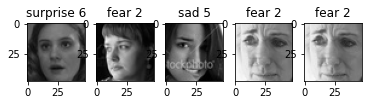

In [5]:
for i in range(5):
    
    x = np.random.randint(len(df_train))
    img_train = cv2.imread(df_train['Paths'][x])
    exp = df_train['Expression'][x]
    fr = img_train[:,:,::-1]
    plt.imshow(fr)
    plt.subplot(1,5,i+1)
    plt.title( labelencoder.inverse_transform([exp])[0]+" "+str(exp))
    #plt.title( exp)
    plt.imshow(fr)

In [6]:
df_test_list = []
for expression in os.listdir("fer2013-kaggle/test"):
    path_files =  os.listdir("fer2013-kaggle/test/" + expression)
    
    for path in path_files:
        path_file =os.path.join("fer2013-kaggle\\test\\", expression,path)
        df_test_list.append([path_file, expression])
        
df_test = pd.DataFrame(df_test_list,columns=['Paths', 'Expression'])
df_test['Expression'] = labelencoder.fit_transform(df_test['Expression'])

df_test = df_test.sample(frac=1)
df_test = df_test.reset_index(drop=True)
df_test.head()

,Paths,Expression
0,fer2013-kaggle\test\angry\PrivateTest_29669680...,0
1,fer2013-kaggle\test\angry\PublicTest_77172367.jpg,0
2,fer2013-kaggle\test\happy\PublicTest_80238560.jpg,3
3,fer2013-kaggle\test\happy\PrivateTest_54165289...,3
4,fer2013-kaggle\test\neutral\PublicTest_5974021...,4


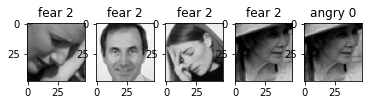

In [7]:
for i in range(5):
    x = np.random.randint(len(df_test))
    img_test = cv2.imread(df_test['Paths'][x])
    exp = df_train['Expression'][x]
    fr = img_test[:,:,::-1]
    plt.imshow(fr)
    plt.subplot(1,5,i+1)
    plt.title( labelencoder.inverse_transform([exp])[0]+" "+str(exp))
    plt.imshow(fr)

In [8]:
df_train.to_csv("fer2013-kaggle/Train.csv", index= None)
df_test.to_csv("fer2013-kaggle/Test.csv", index= None)